# Annual Electricity Price by State

https://data.world/us-doe-gov/4e49962e-cf5a-4004-bd59-9b98585aa47e

## Loading The Dataset

In [153]:
import pandas as pd

In [154]:
df = pd.read_excel("average-price-by-state-by-provider-1.xls")
df.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
0,2020,AK,Total Electric Industry,22.57,19.58,15.88,0.00,NaN,19.82
1,2020,AL,Total Electric Industry,12.58,11.55,5.87,0.00,NaN,9.84
2,2020,AR,Total Electric Industry,10.41,8.61,5.89,13.32,NaN,8.32
3,2020,AZ,Total Electric Industry,12.27,10.11,6.07,9.38,NaN,10.44
4,2020,CA,Total Electric Industry,20.45,17.53,14.27,10.07,NaN,18.00


In [155]:
df.dtypes

Year                          int64
State                        object
Industry Sector Category     object
Residential                 float64
Commercial                  float64
Industrial                  float64
Transportation              float64
Other                       float64
Total                       float64
dtype: object

In [156]:
df.shape

(4605, 9)

## Understanding The Dataset

In [157]:
df.columns

Index(['Year', 'State', 'Industry Sector Category', 'Residential',
       'Commercial', 'Industrial', 'Transportation', 'Other', 'Total'],
      dtype='object')

In [158]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['Year', 'State', 'Industry_Sector_Category', 'Residential',
       'Commercial', 'Industrial', 'Transportation', 'Other', 'Total'],
      dtype='object')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4605 entries, 0 to 4604
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4605 non-null   int64  
 1   State                     4605 non-null   object 
 2   Industry_Sector_Category  4605 non-null   object 
 3   Residential               4605 non-null   float64
 4   Commercial                4605 non-null   float64
 5   Industrial                4605 non-null   float64
 6   Transportation            2998 non-null   float64
 7   Other                     1607 non-null   float64
 8   Total                     4605 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 323.9+ KB


## Handling The Missing Data

In [160]:
df.isnull().sum()

Year                           0
State                          0
Industry_Sector_Category       0
Residential                    0
Commercial                     0
Industrial                     0
Transportation              1607
Other                       2998
Total                          0
dtype: int64

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(10,8)})

<AxesSubplot: >

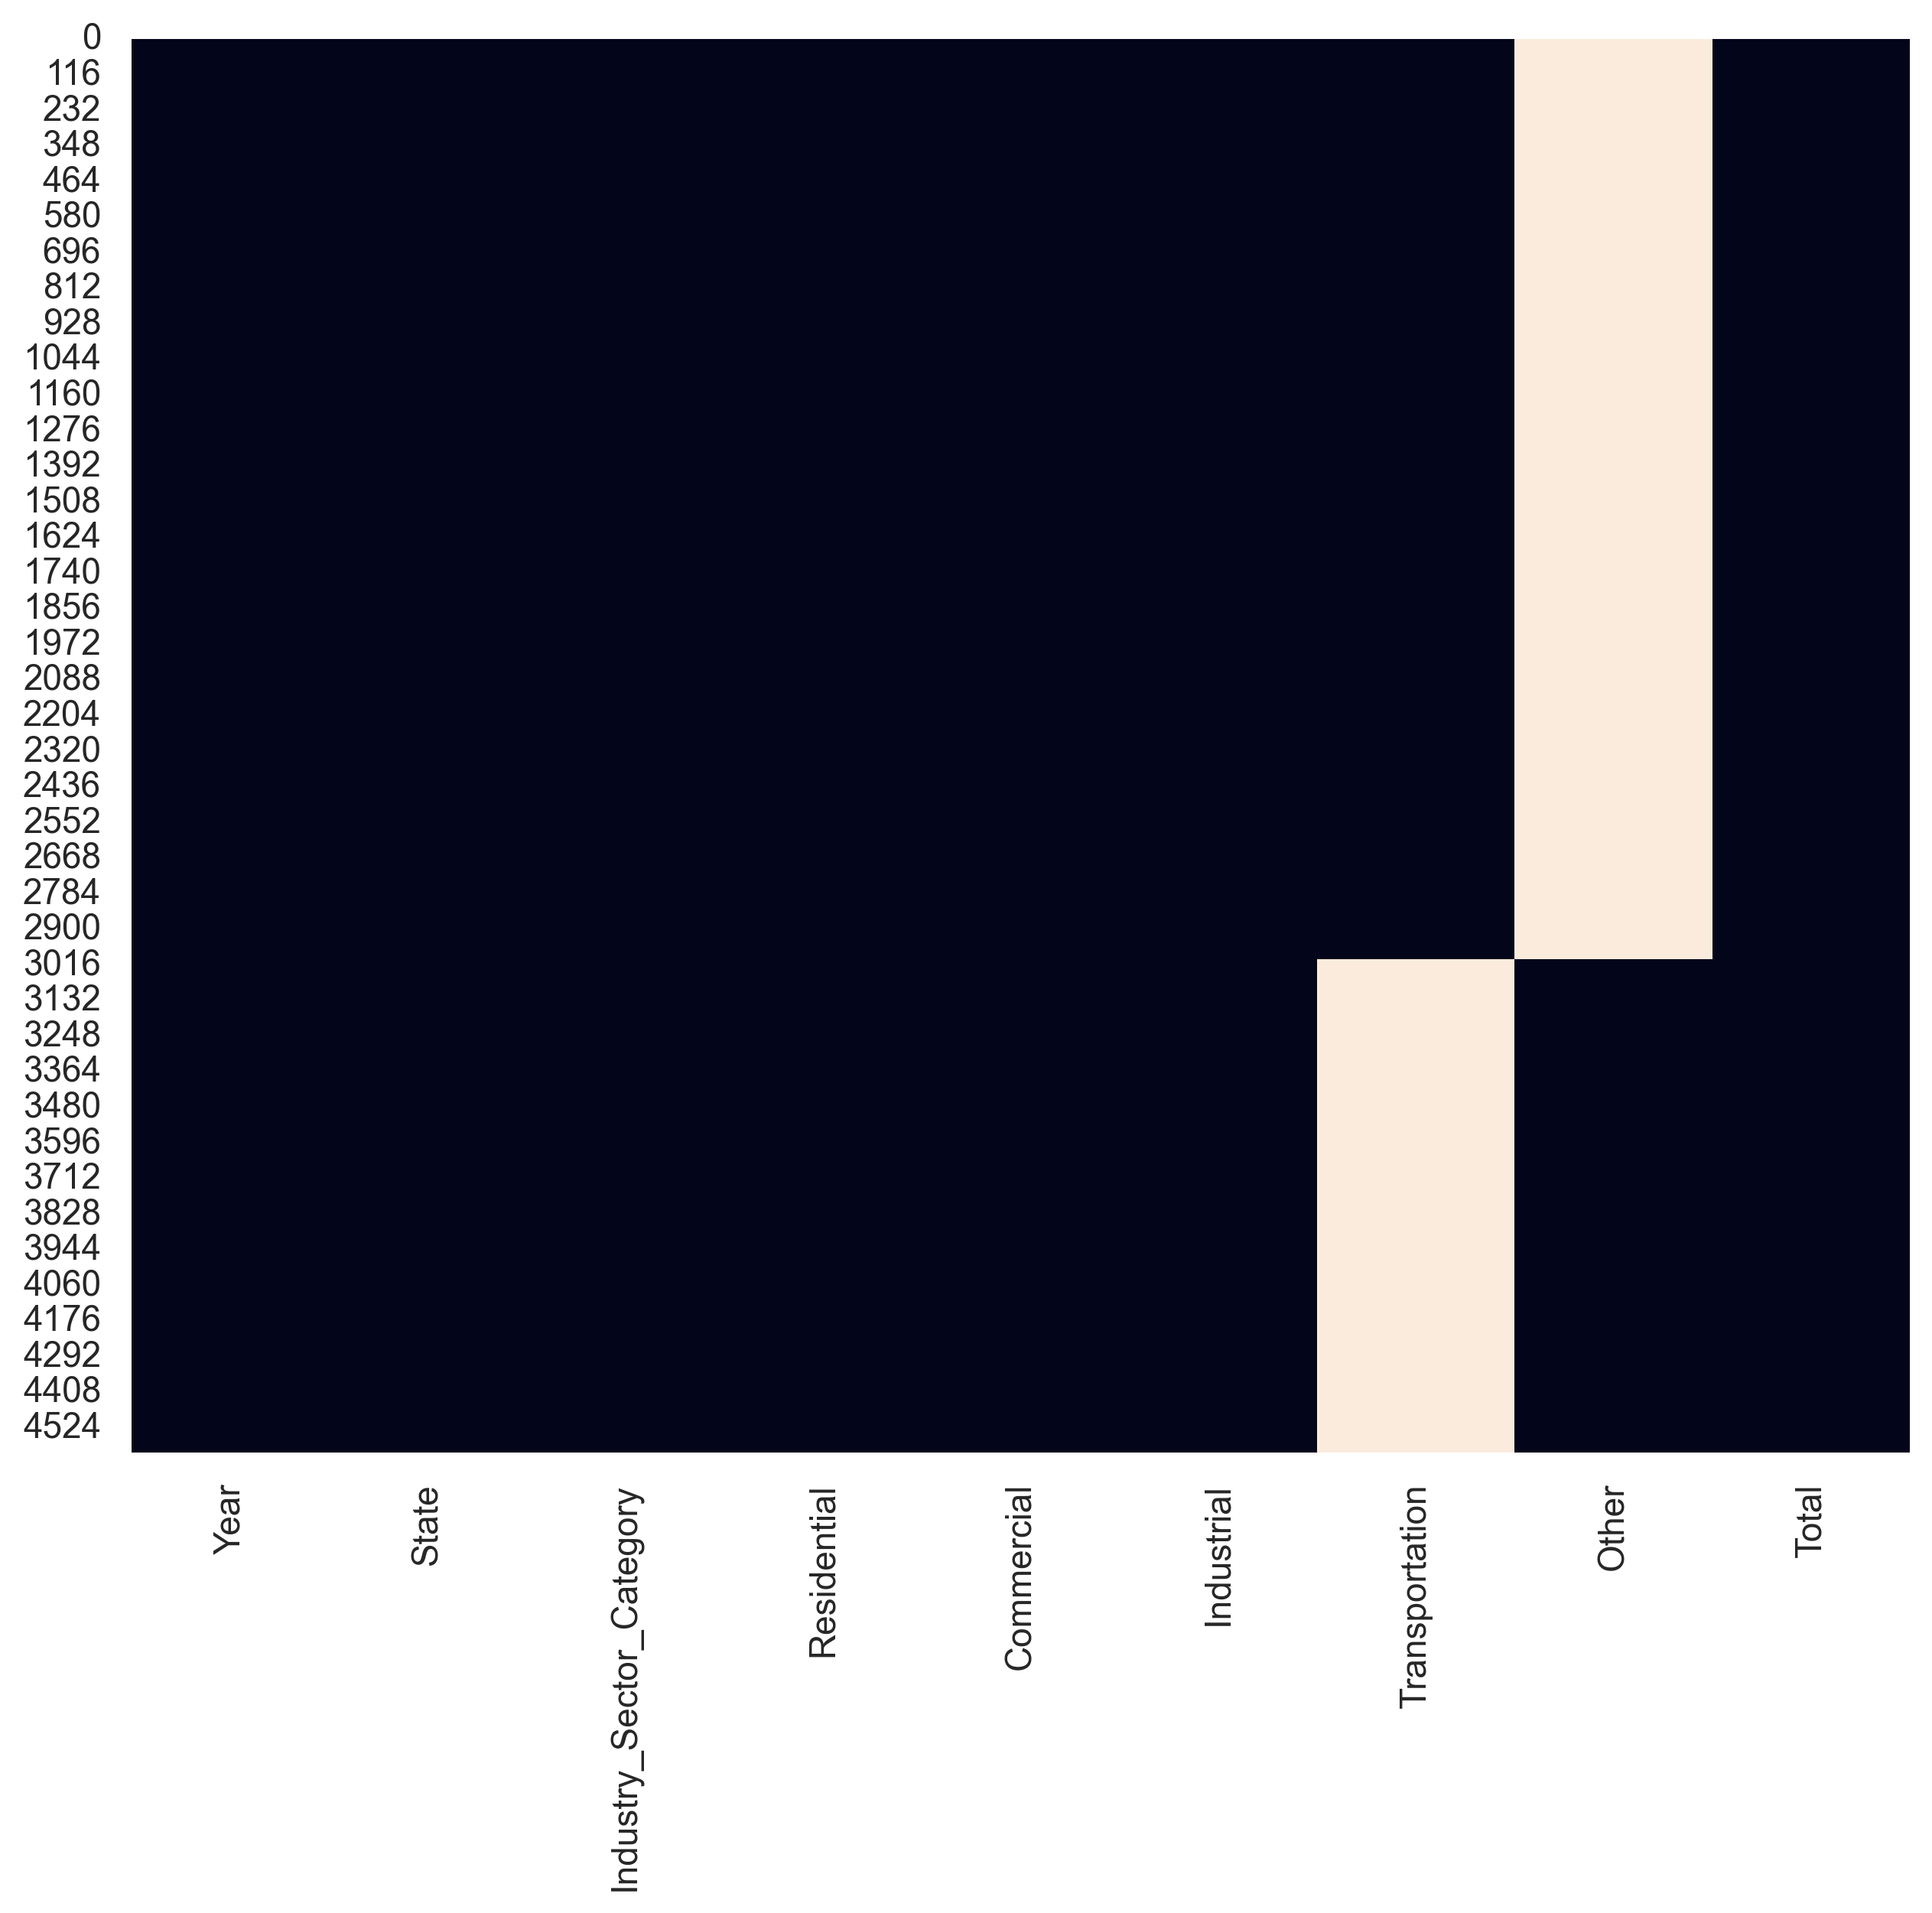

In [162]:
sns.heatmap(df.isnull(), cbar=False)

In [163]:
# I'm going to use the median value for missing data in the transportation column. 
# Note that the median is more robust than the mean for the outlier values.

tr_median = df["Transportation"].median()
print(tr_median)
df["Transportation"].fillna(tr_median, inplace=True)

1.1949999999999998


In [164]:
df.drop("Other",axis=1, inplace=True)

In [165]:
df.isnull().sum()

Year                        0
State                       0
Industry_Sector_Category    0
Residential                 0
Commercial                  0
Industrial                  0
Transportation              0
Total                       0
dtype: int64

In [166]:
df["Industry_Sector_Category"].value_counts()

Total Electric Industry                  1612
Full-Service Providers                   1612
Restructured Retail Service Providers     476
Energy-Only Providers                     474
Delivery-Only Service                     431
Name: Industry_Sector_Category, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Industries')

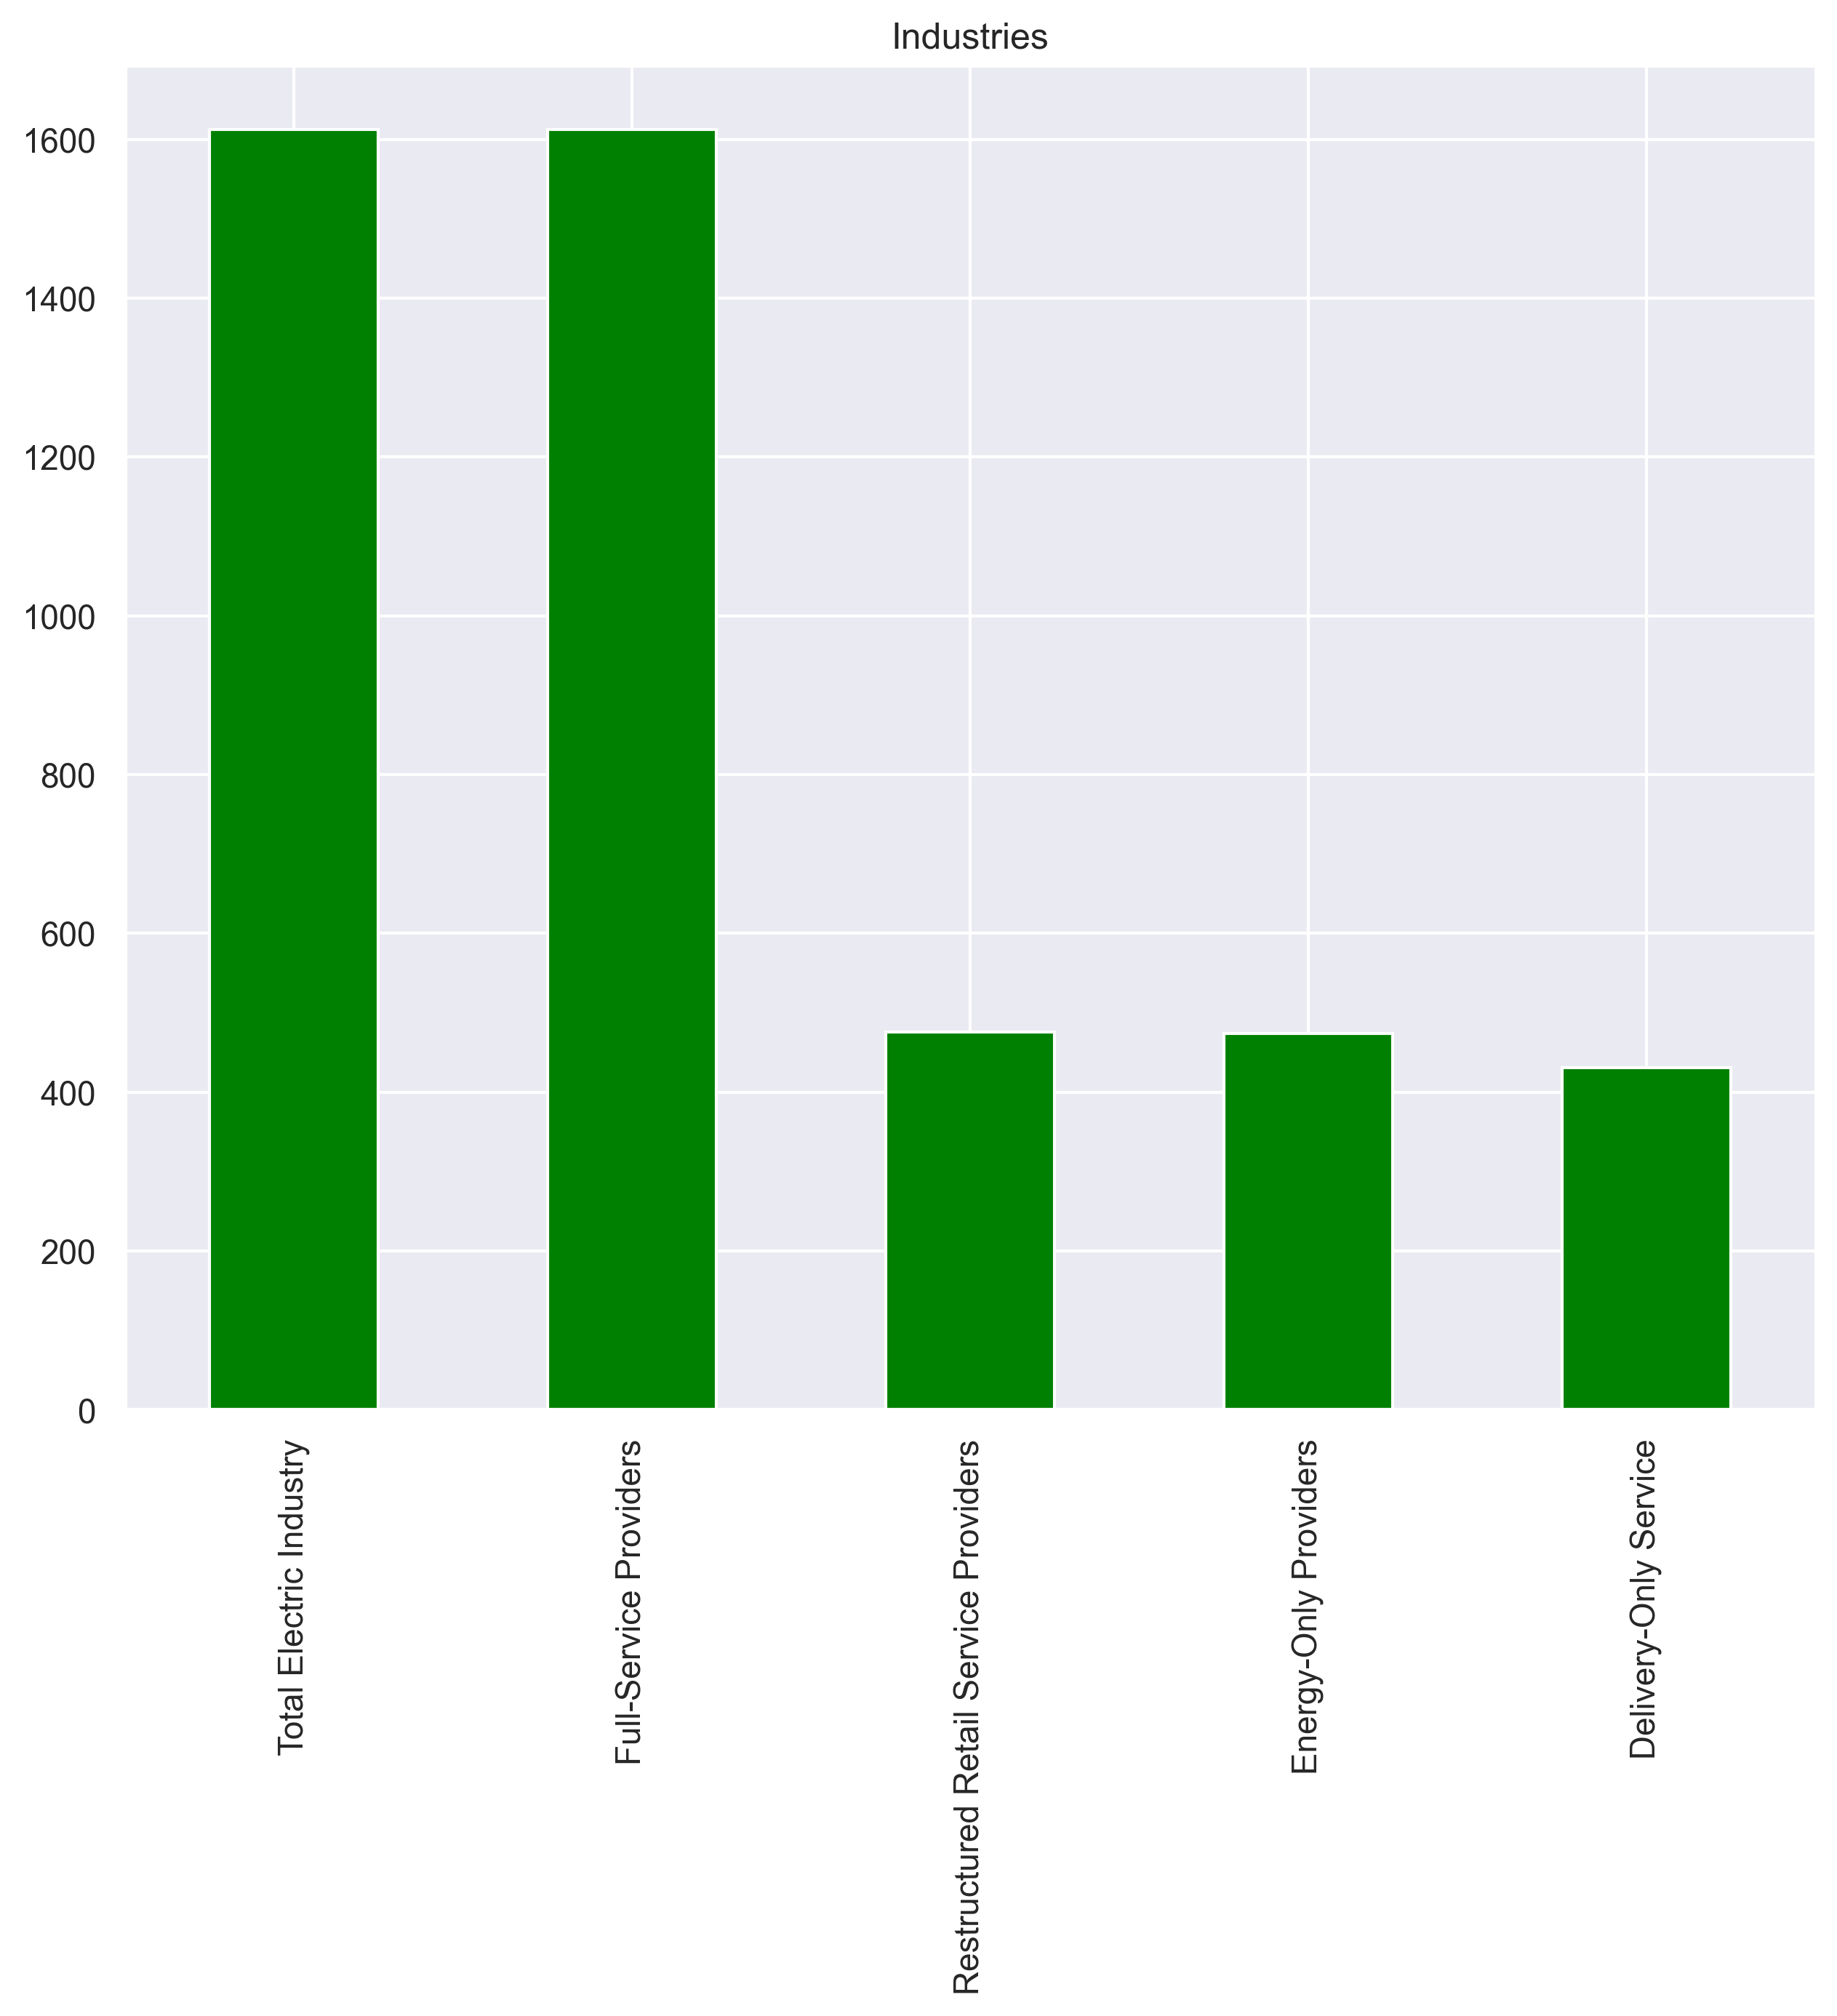

In [167]:
# Bar plot for the type column

df["Industry_Sector_Category"].value_counts().plot(kind="bar", color ="green")
plt.title("Industries")

Text(0.5, 1.0, 'The relationship between Total price and States')

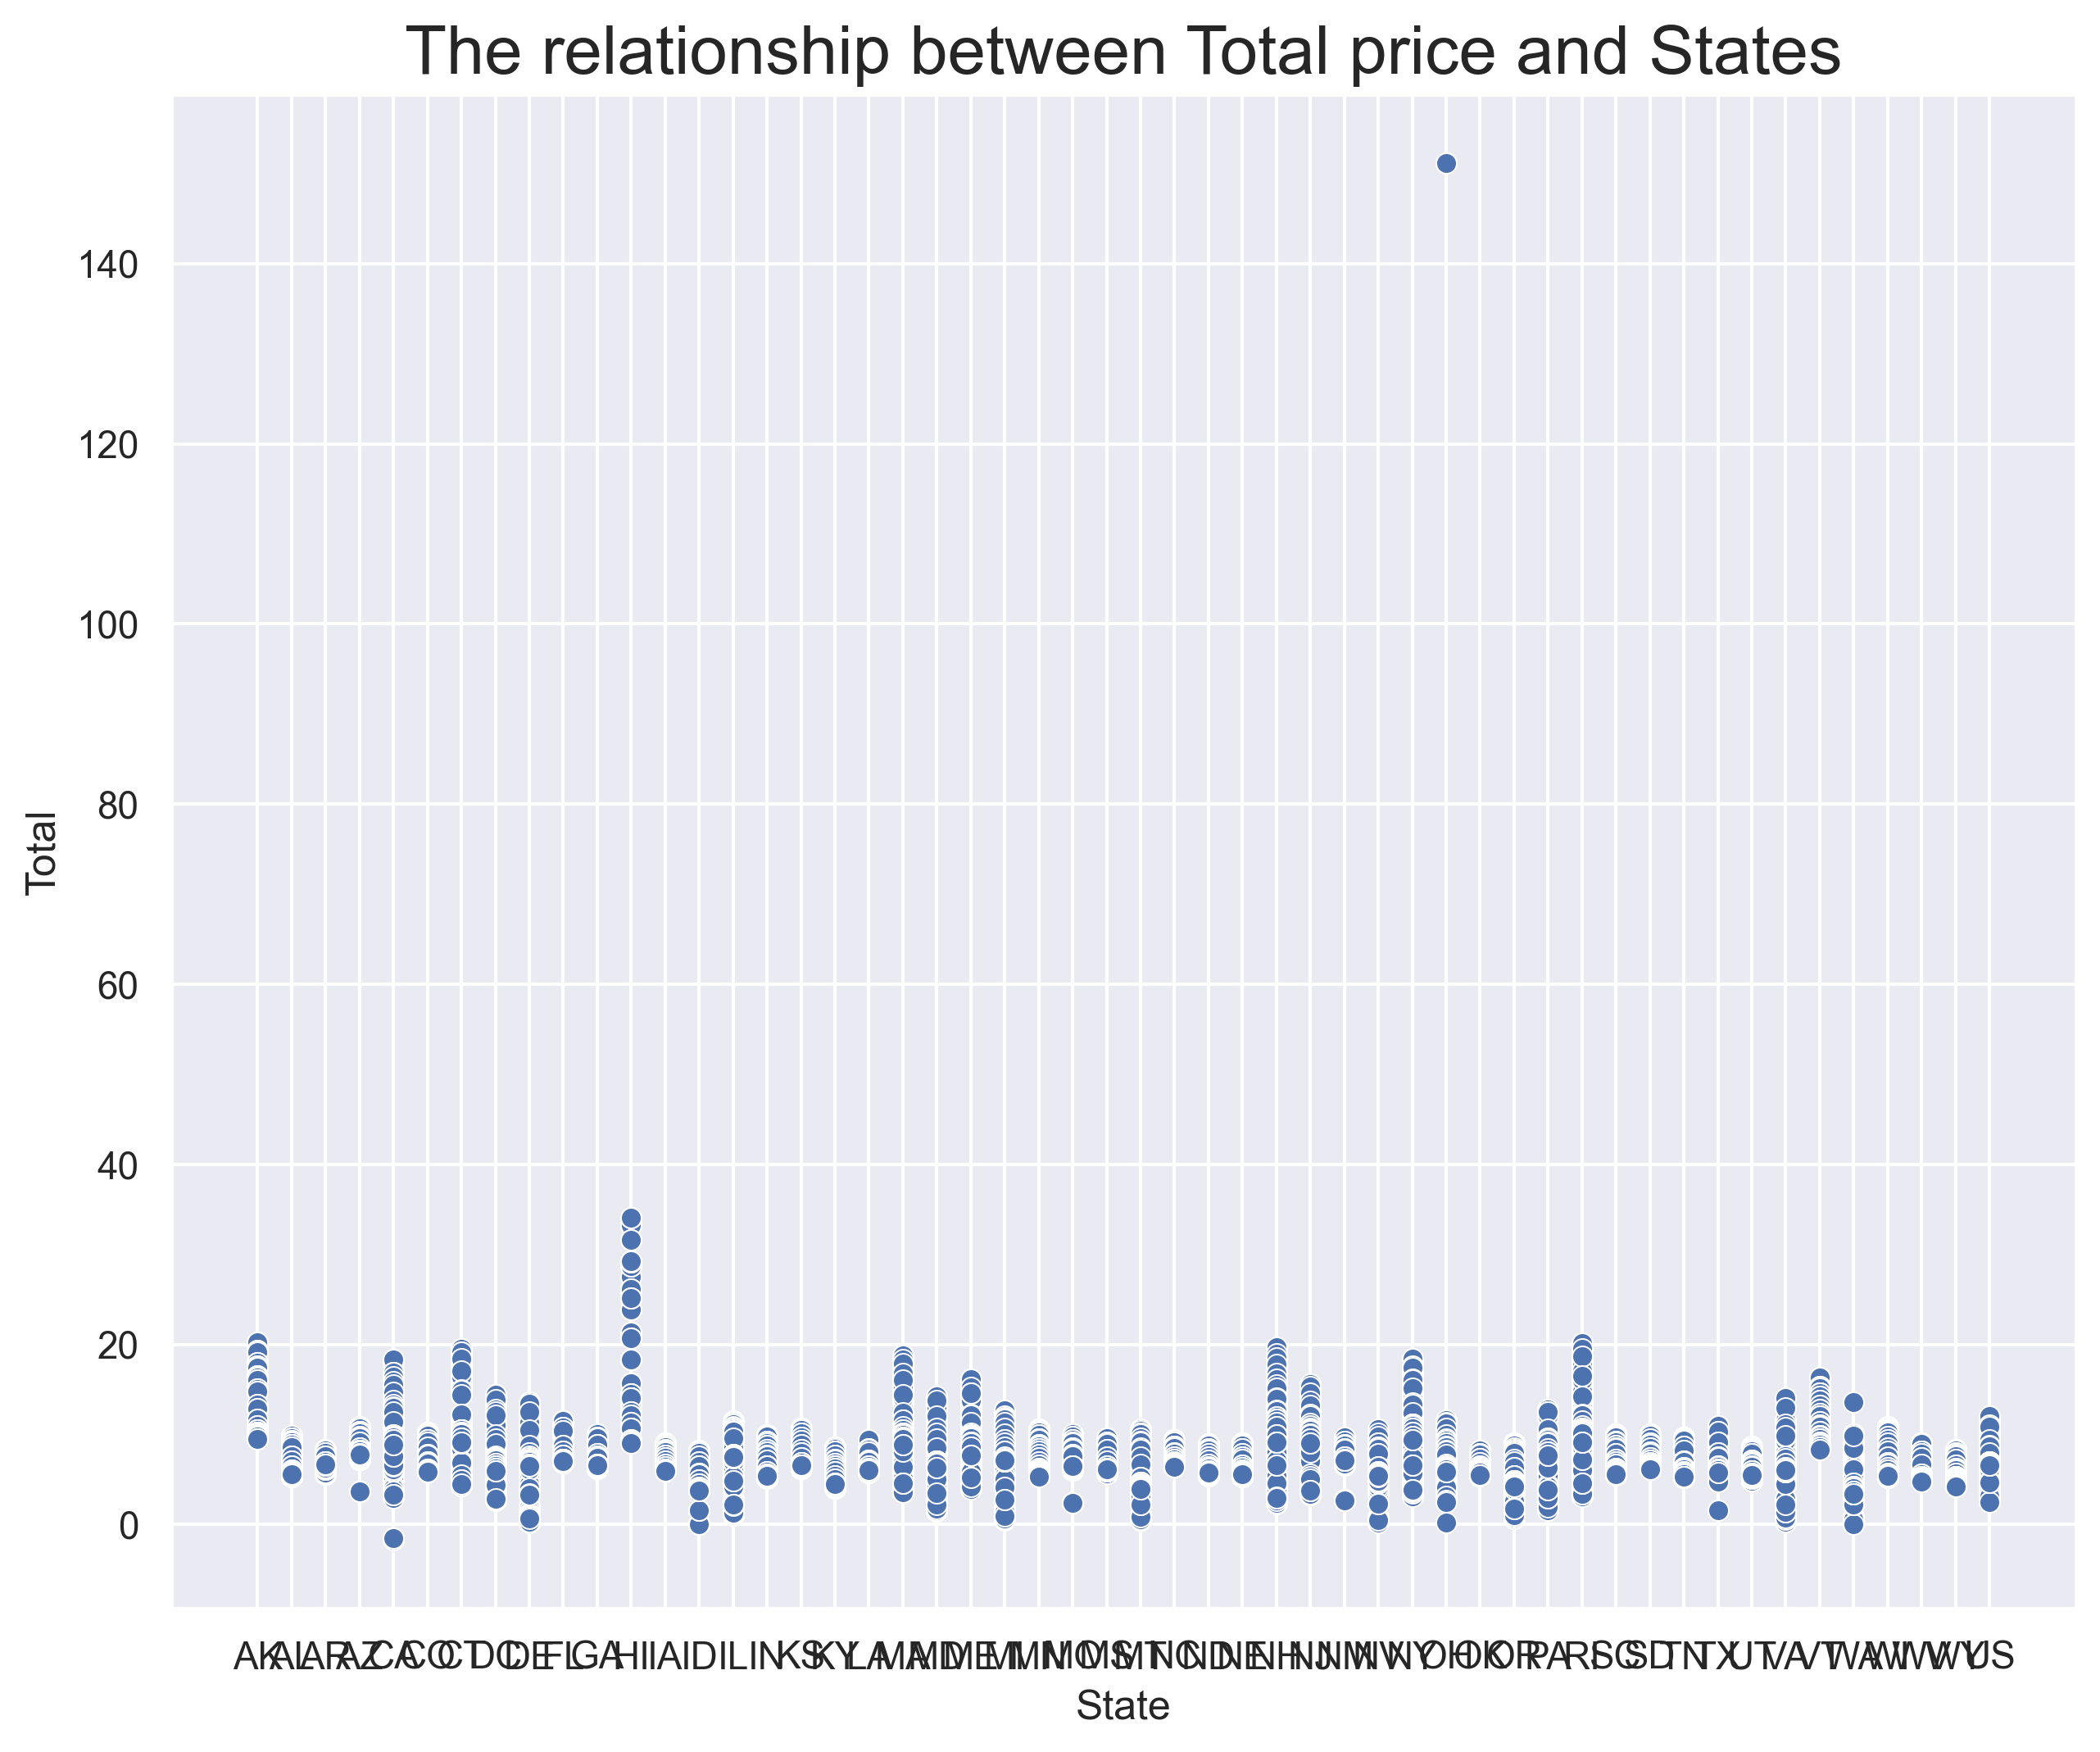

In [168]:
sns.scatterplot(x=df["State"], y=df["Total"])
plt.title('The relationship between Total price and States', fontsize = 20)

C:\Users\ismai\AppData\Local\Temp\ipykernel_12052\1994500934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt=".2f")


Text(0.5, 1.0, 'Heatmap for numerical columns')

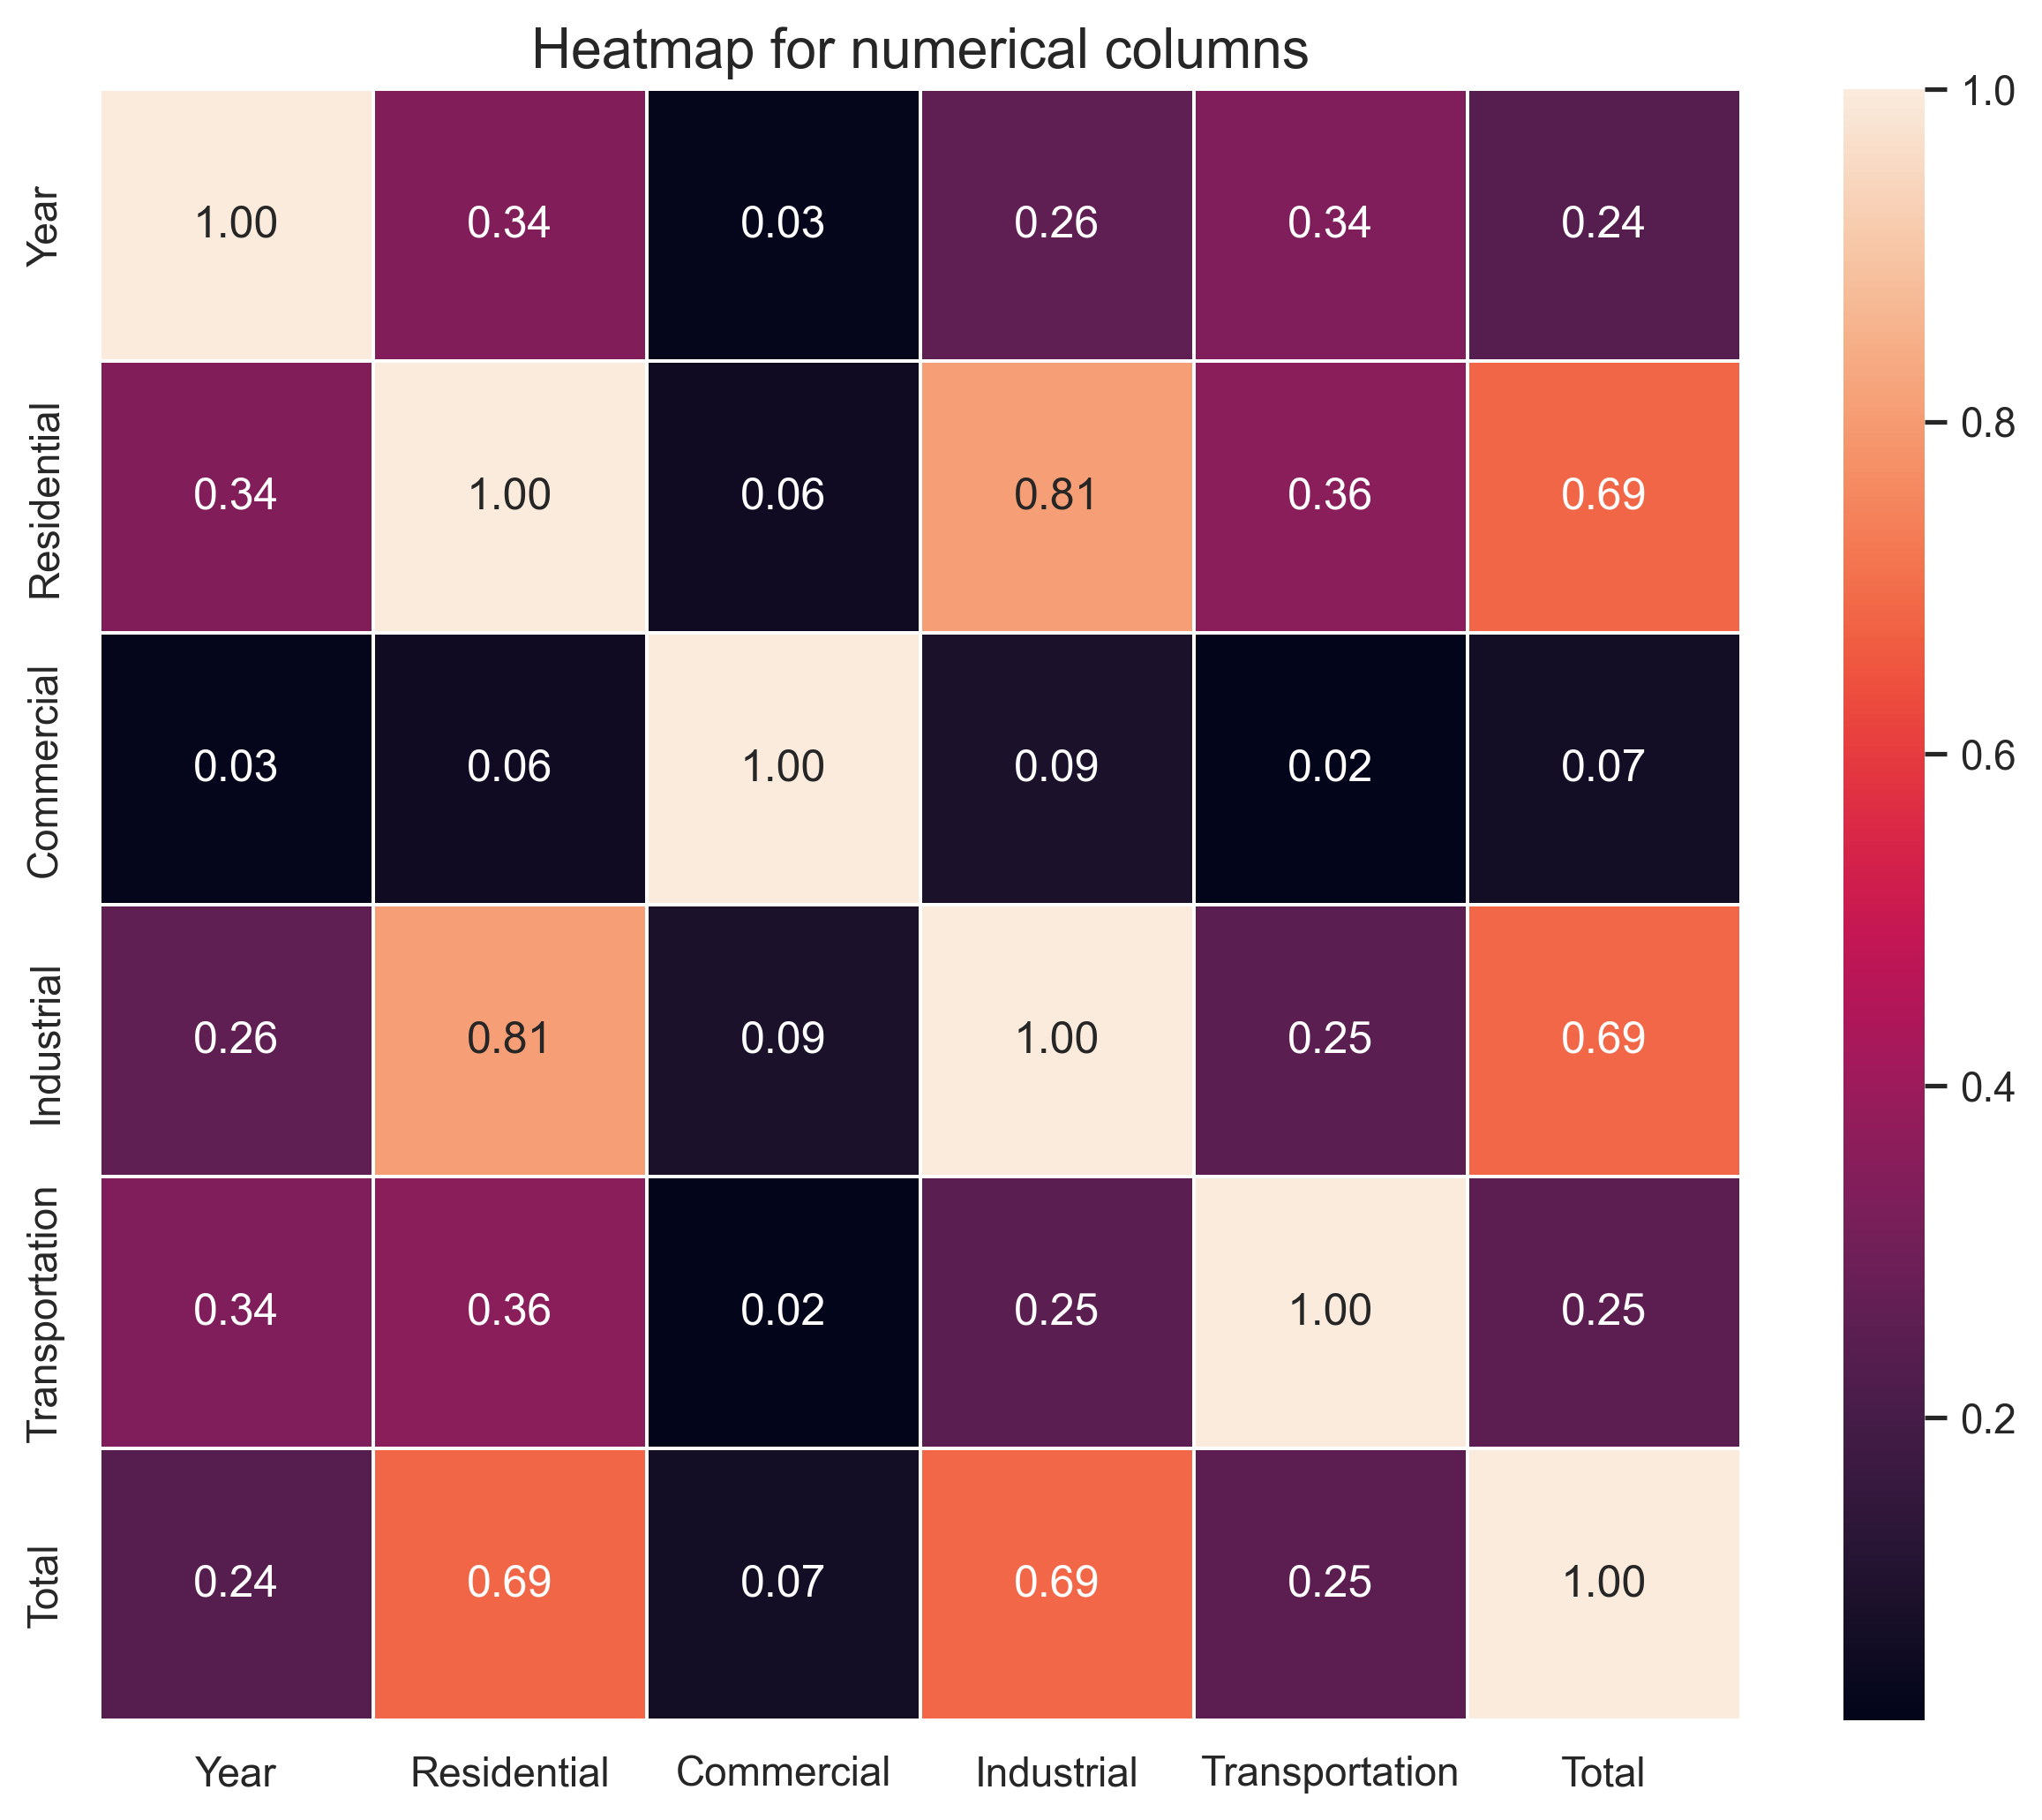

In [169]:
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=15)

In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4605.0,2006.319218,8.528696,1990.00,2000.00,2007.000,2014.00,2020.00
Residential,4605.0,9.456337,4.709534,-0.48,7.02,9.100,11.81,37.34
Commercial,4605.0,8.861574,33.372529,-1.35,6.12,7.740,9.89,1600.00
Industrial,4605.0,5.995346,3.279020,-2.09,4.22,5.480,7.32,30.82
Transportation,4605.0,3.089106,3.988790,0.00,0.00,1.195,6.32,25.28
Total,4605.0,8.067409,4.815615,-1.67,5.71,7.460,9.75,151.19


## Training the Model

In [171]:
X = df.drop(["Total"], axis=1)
y = df.Total

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [174]:
categorical_cols = [cname for cname in X_train.columns 
                    if X_train[cname].nunique()<10 and X_train[cname].dtype == "object"]
len(categorical_cols)

1

In [175]:
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ["int64", "float64"]]
len(numerical_cols)

5

In [176]:
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols]
X_test = X_test[my_cols]

In [177]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [178]:
numerical_transformer = Pipeline(steps=[("imputer_num", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("imputer_cal", SimpleImputer(strategy="most_frequent")), 
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("num", numerical_transformer, numerical_cols),
                                               ("cat", categorical_transformer, categorical_cols)])

In [179]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
my_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", rf)])

In [180]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Residential',
                                                   'Commercial', 'Industrial',
                                                   'Transportation']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cal',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Industry_Sector_Category'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [181]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [182]:
preds_test = my_pipeline.predict(X_test)
preds_train = my_pipeline.predict(X_train)

In [183]:
mean_absolute_error(preds_test, y_test)

0.2836966301725178

In [184]:
mean_absolute_error(preds_train, y_train)

0.10882299924168026

In [185]:
from sklearn.model_selection import cross_val_score
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators, random_state=1))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, 
                   scoring = "neg_mean_absolute_error")
    return scores.mean()

In [186]:
result = {}
for i in range(2,8):
    result[50*i] = get_score(50*i)

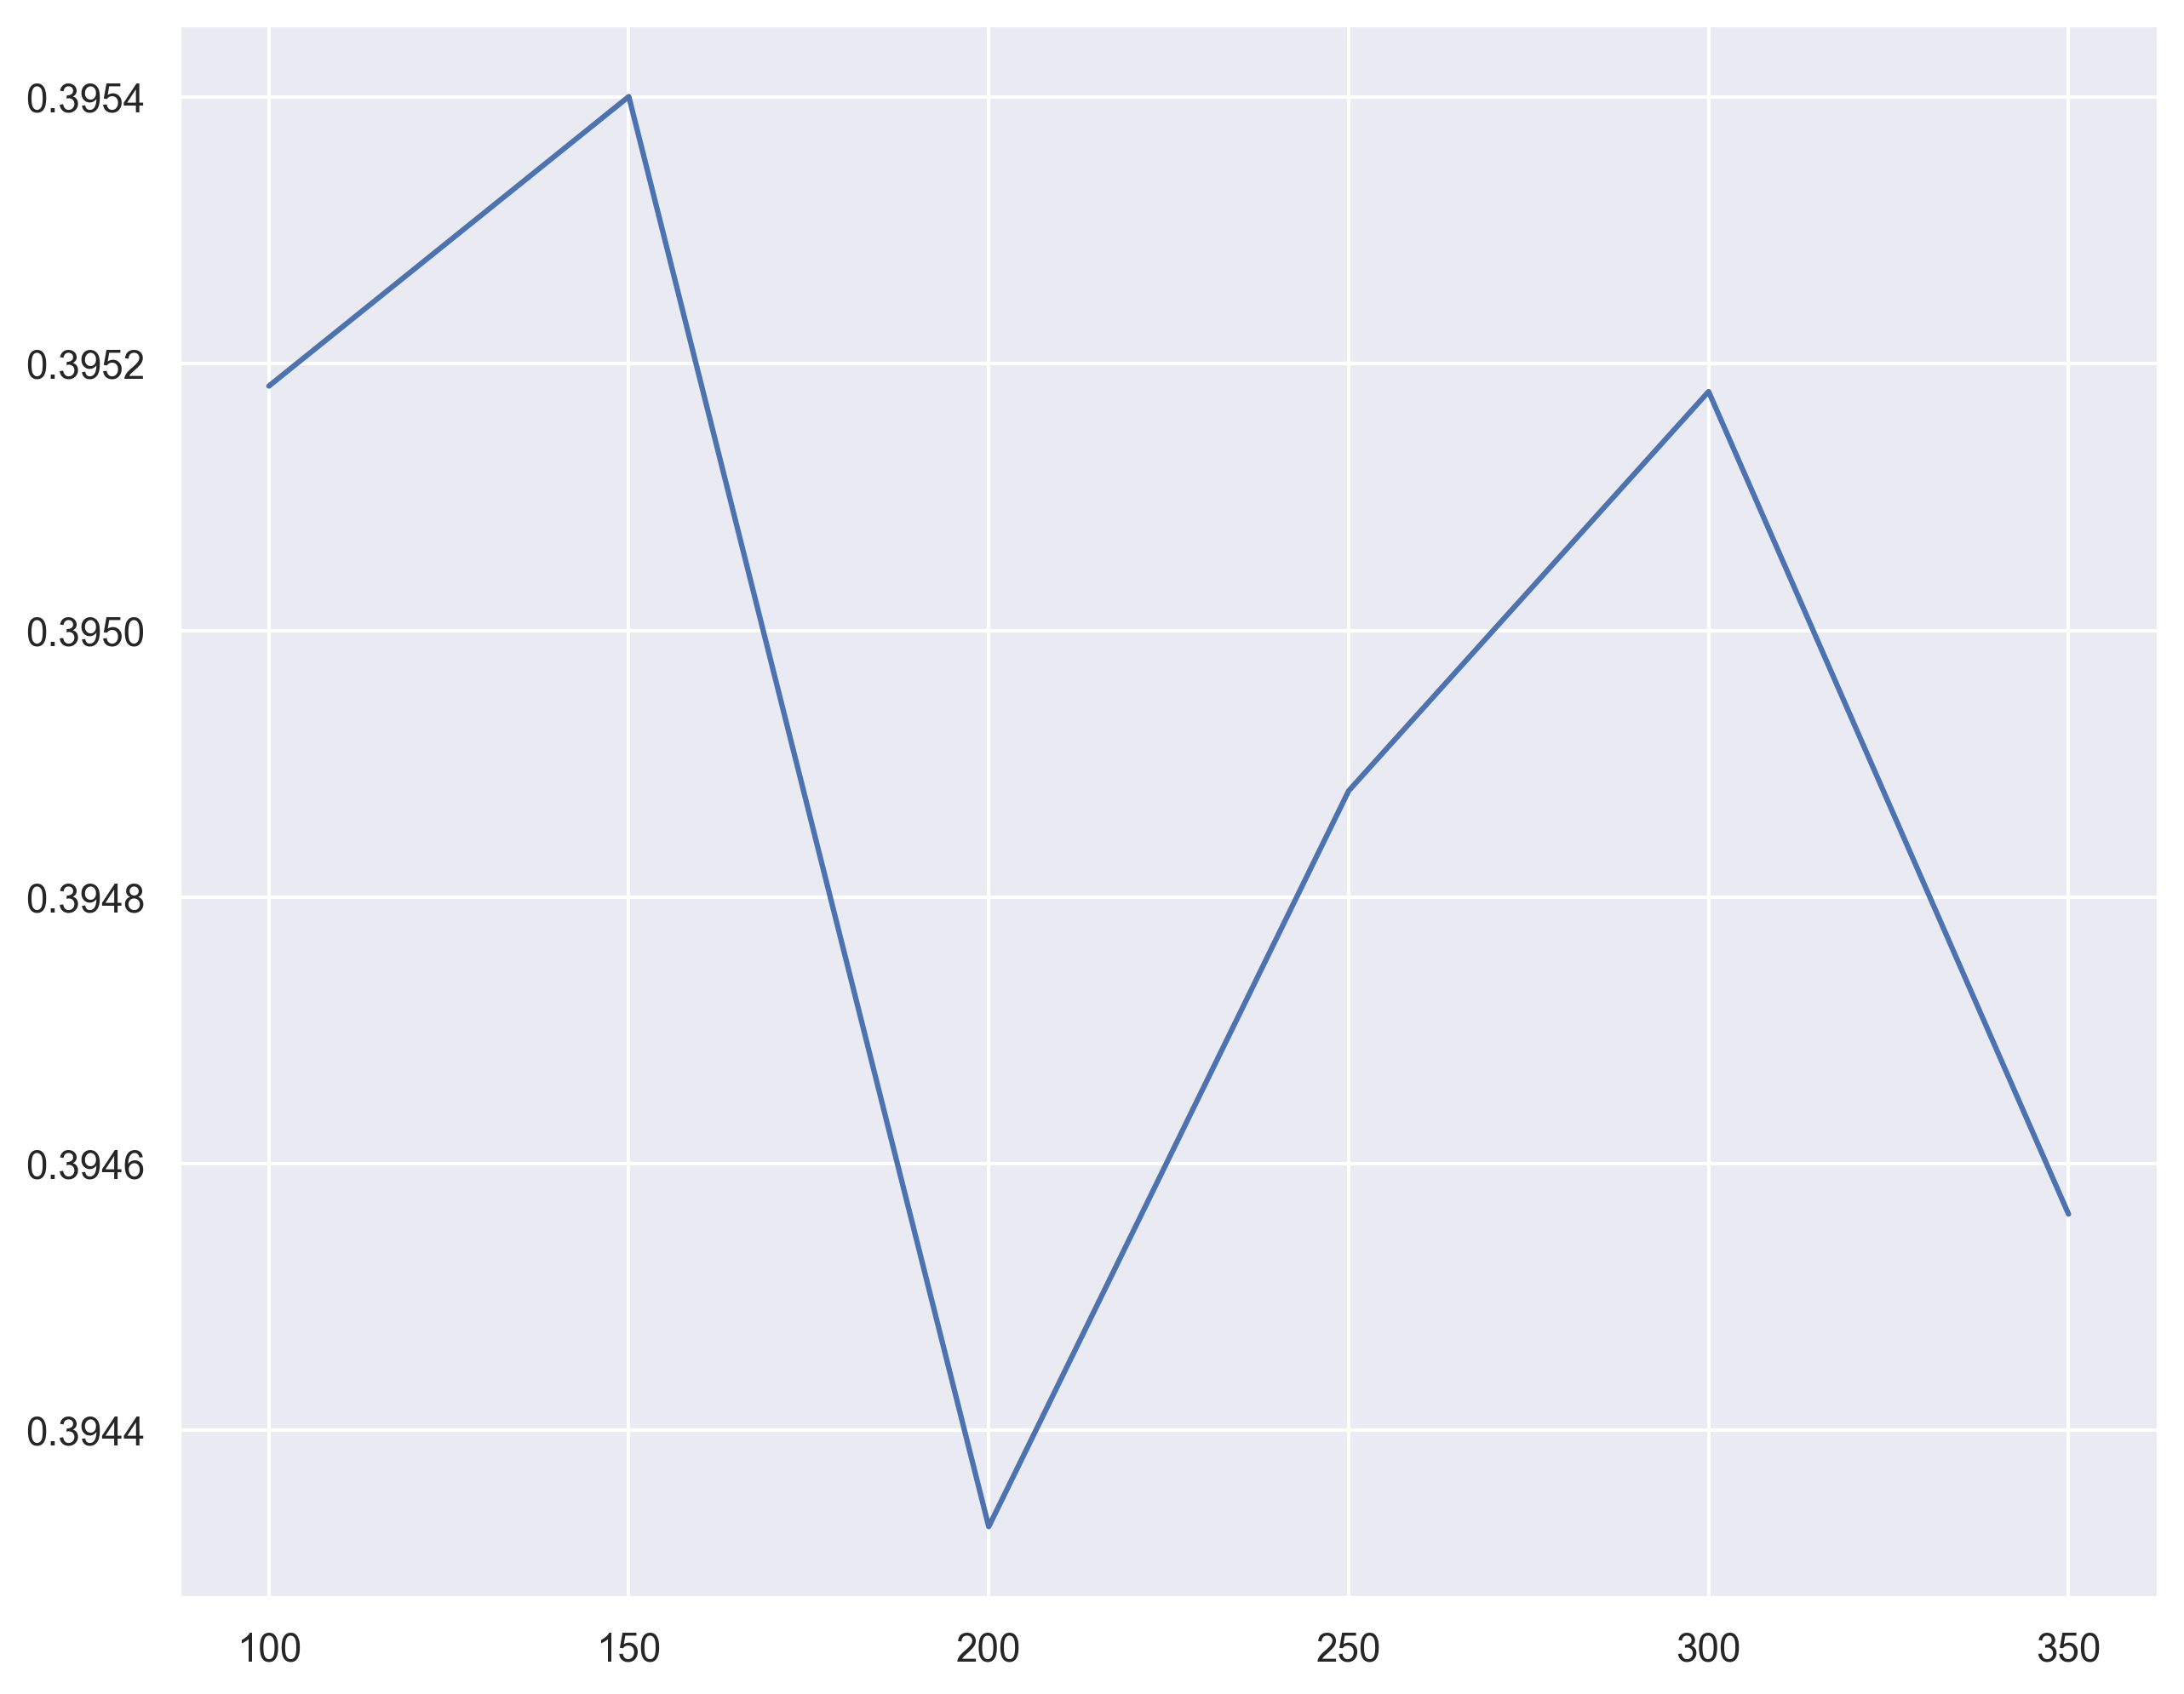

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(result.keys()), list(result.values()))
plt.show()

In [188]:
model = RandomForestRegressor(n_estimators=200, random_state=1)
my_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [193]:
my_pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Residential',
                                                   'Commercial', 'Industrial',
                                                   'Transportation']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cal',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Industry_Sector_Category'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=1))])

In [194]:
new_preds_test = my_pipeline.predict(X_test)
new_preds_train = my_pipeline.predict(X_train)

In [195]:
mean_absolute_error(new_preds_test, y_test)

0.09848332748443558

In [196]:
mean_absolute_error(preds_train, y_train)

0.10882299924168026